In [82]:
import numpy as np
import matplotlib.pylab as plt

In [83]:
class Electron(object):
    def __init__(self,vec,r=2):                #vec = Coords x,y. r = atomic radius
        self.x = vec[0]
        self.y = vec[1]
        self.q = 1.60217662                    #*1e-19
        self.r = r
        
        self.coords = np.zeros((1,3))
        self.coords[0,0] , self.coords[0,1] = self.x,self.y
        self.coords[0,2] = np.sqrt(r**2 - self.x**2 - self.y**2)*np.random.choice([-1,1])
        
        self.timesRec = 0  #Times the function changePos is recursively called.

    def getCoords(self):
        return self.coords
    
    def getForce(self,Elect):                   #Force from Elect on self
        Rvec = Elect.getCoords() - self.coords  #Direction of the force  
        R = np.sqrt(Rvec @ Rvec.T)              #Distance between electrons
        F = 1/R**3                              #Magnitude of the force
        
        return -F*Rvec                           #Returns vector F.
    
    def changePos(self,vec):          #vec: vector force. indicates where to move
        r = self.r
        self.coords += vec

        distance = np.sqrt(self.coords @ self.coords.T)  #Distance from newCoord to origin
        
        if distance != self.r:
            if self.timesRec <=3:
                self.timesRec += 1
                fix = -(self.coords/distance) * (distance - self.r)
                self.changePos(fix)     #Move to the point where the radius to newCoord matches the surface
            else:
                self.timesRec = 0
        
        
    def getAllForces(self,listElectrons):    #Matriz con fuerza neta sobre cada electrón
        noElectrons = len(listElectrons)           
        Forces = np.matrix(np.zeros((noElectrons,3)))
        for i in range(noElectrons):                  
            for j in range(noElectrons):
                if j != i:
                    Forces[i,:] += listEl[i].getForce(listEl[j])
        return Forces
    
    def getRadius(self):
        return np.sqrt(self.coords @ self.coords.T)

    def distFromEl(self, listElect, ind):
        Elect = listElect[ind]        
        Rvec = Elect.getCoords() - self.coords  #Direction of the force  
        return np.sqrt(Rvec @ Rvec.T) #Distance between electrons 

In [84]:
noElectrons = 2
listEl = [Electron(np.random.random(2)) for i in range(noElectrons)] #List of electrons

def move(listElectrons, ind): #Index: the number of electron in the list    
    dl = 5e-2
    Force = listElectrons[0].getAllForces(listElectrons)[ind,:]   #get net force on the electron with index [ind]
    
    minInd = 0          #Initialize variable

    dirMov = Force*dl    #Move in the direction of the force, a small distance
    coords =listElectrons[ind].getCoords() 
    coord = coords[0,minInd]
    
    listElectrons[ind].changePos(dirMov)
    
    coords =listElectrons[ind].getCoords() 

In [85]:
histF = []
iters = 2000
for i in range(iters):
    Force = listEl[0].getAllForces(listEl)[0,:]  #This is only for calculating the magnitude of the force
    F = np.sqrt(Force @ Force.T)[0,0]            #^^same
    move(listEl, 0)
    histF.append(F)

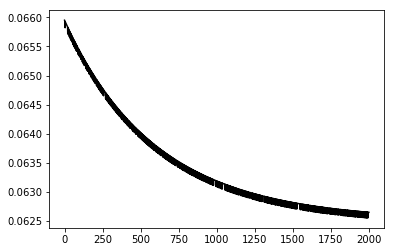

In [86]:
%matplotlib inline
x=[i for i in range(len(histF))]
plt.plot(x,histF,'k-')
plt.show()

All of the above works for a system of two electrons, optimizing by moving only one. The following will generalize to more than 2 electrons.

In [87]:
noElectrons = 4
listEl = [Electron(np.random.random(2)) for i in range(noElectrons)]  #List of electrons

histF = []
iters = 2000
for i in range(iters):
    suma  = 0
    for j in range(noElectrons):
        Force = listEl[0].getAllForces(listEl)[j,:]  #This is only for calculating the magnitude of the force
        F = np.sqrt(Force @ Force.T)[0,0]            #^^same
        move(listEl, j)
        suma += F
    histF.append(suma/noElectrons) #Average of the forces between electrons on each iteration

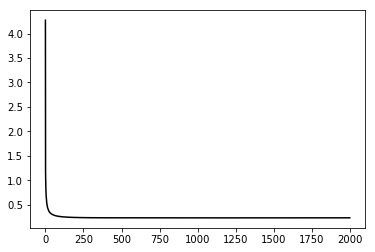

In [88]:
x=[i for i in range(len(histF))]
plt.plot(x,histF,'k-')
plt.show()

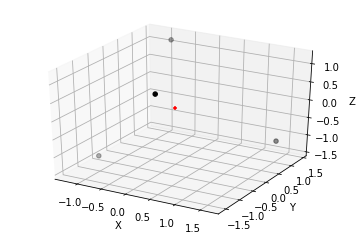

In [89]:
#The following lines plot the system in a 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.array([listEl[i].getCoords()[0,0] for i in range(noElectrons)])
ys = np.array([listEl[i].getCoords()[0,1] for i in range(noElectrons)])
zs = np.array([listEl[i].getCoords()[0,2] for i in range(noElectrons)])

ax.scatter(xs,ys,zs, marker = 'o',color = 'k')
ax.scatter(0,0,0, marker = '+',color='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()

In [90]:
#Plot distances between each electron at the end of the optimization
for i in range(noElectrons): 
    for j in range(noElectrons):
        print('distance from e-',i,'to e- ',j,': ',listEl[j].distFromEl(listEl,i))
    print('-------------------------------')

distance from e- 0 to e-  0 :  [[ 0.]]
distance from e- 0 to e-  1 :  [[ 3.26590373]]
distance from e- 0 to e-  2 :  [[ 3.26624524]]
distance from e- 0 to e-  3 :  [[ 3.26581701]]
-------------------------------
distance from e- 1 to e-  0 :  [[ 3.26590373]]
distance from e- 1 to e-  1 :  [[ 0.]]
distance from e- 1 to e-  2 :  [[ 3.2658638]]
distance from e- 1 to e-  3 :  [[ 3.26618879]]
-------------------------------
distance from e- 2 to e-  0 :  [[ 3.26624524]]
distance from e- 2 to e-  1 :  [[ 3.2658638]]
distance from e- 2 to e-  2 :  [[ 0.]]
distance from e- 2 to e-  3 :  [[ 3.26589934]]
-------------------------------
distance from e- 3 to e-  0 :  [[ 3.26581701]]
distance from e- 3 to e-  1 :  [[ 3.26618879]]
distance from e- 3 to e-  2 :  [[ 3.26589934]]
distance from e- 3 to e-  3 :  [[ 0.]]
-------------------------------
